<h1 align=center><font size=5>Feature Engineering - Jaffar</font></h1>

<h1>Data Wrangling</h1>

<h2>Purpose of Data Wrangling</h2>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<h4>Importing libraries</h4> 

In [53]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>Data sources</h4> 
The first type of data needed for this analysis was air quality data. I gathered this data from the World
Air Quality Index (WAQI) Project website. Daily average pollutant data is recorded by WAQI. It is important to note however
that all figures in these data sets are not raw concentrations for pollutants but each of the pollutant
concentrations has been converted to Air Quality Index (AQI) using the United States Environmental
Protection Agency (EPA) standards.


The second type of data needed for the analysis is data related to traffic congestion levels. Data is collected from TomTom traffic stats, a world leading name in navigation technology services which gives average daily congestion levels for the city under consideration. This data set contains congestion levels for multiple cities.

Use the Pandas method <b>read_csv()</b> to load the data.

In [54]:
# reading air pollution and traffic congestion data
df = pd.read_csv("London-aq.csv") #city congestion data set
df2=  pd.read_csv("tomtomP.csv") #pollutant levels data set

In [55]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,date,pm25,pm10,o3,no2,so2,co,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,congestion (%)_lon,Unnamed: 12,beij_no2_filt,congestion (%)_beij,Unnamed: 15,la_no2,la_cong,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,01-Jan-19,49,22,23,26,1,8,NaN,NaN,NaN,...,11.0,NaN,31.0,23.0,NaN,24.0,9.0,NaN,3,18.0
1,02-Jan-19,59,26,24,31,1,8,NaN,NaN,NaN,...,19.0,NaN,33.0,40.0,NaN,32.0,28.0,NaN,6,30.0
2,03-Jan-19,55,39,16,31,1,10,NaN,NaN,NaN,...,22.0,NaN,27.0,48.0,NaN,29.0,32.0,NaN,2,30.0
3,04-Jan-19,92,31,19,29,2,10,NaN,NaN,NaN,...,20.0,NaN,32.0,33.0,NaN,25.0,21.0,NaN,2,24.0
4,05-Jan-19,81,29,14,31,2,10,NaN,NaN,NaN,...,17.0,NaN,25.0,28.0,NaN,29.0,15.0,NaN,4,18.0


In [56]:
df.tail()

,date,pm25,pm10,o3,no2,so2,co,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,congestion (%)_lon,Unnamed: 12,beij_no2_filt,congestion (%)_beij,Unnamed: 15,la_no2,la_cong,Unnamed: 18,Unnamed: 19,Unnamed: 20
563,21-Jul-20,46,19,41,22,,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,22-Jul-20,50,19,39,26,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,23-Jul-20,47,16,22,20,2,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,24-Jul-20,45,11,17,14,3,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,25-Jul-20,37,11,8,11,3,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df2.head()

,date,london_cong_2020,london_diff_2019,losangeles_cong_2020,losangeles_diff_2019,vanc_cong_2020,vanc_diff_2019,beij_cong_2020,beij_diff_2019,Unnamed: 9,...,la_19,beij_19,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,30-Dec-19,21.0,-36.0,28.0,-32.0,31.0,-9.0,52.0,41.0,NaN,...,41.176471,36.87943262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Dec
1,31-Dec-19,20.0,-46.0,23.0,-51.0,26.0,-37.0,61.0,53.0,NaN,...,46.938776,39.86928105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-Dec
2,01-Jan-20,11.0,-71.0,9.0,-81.0,18.0,-57.0,23.0,-41.0,NaN,...,47.368421,38.98305085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Jan
3,02-Jan-20,19.0,-51.0,28.0,-43.0,30.0,-32.0,40.0,0.0,NaN,...,49.122807,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-Jan
4,03-Jan-20,22.0,-42.0,32.0,-32.0,30.0,-27.0,48.0,9.0,NaN,...,47.058824,44.03669725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Jan


In [58]:
df2.tail()

,date,london_cong_2020,london_diff_2019,losangeles_cong_2020,losangeles_diff_2019,vanc_cong_2020,vanc_diff_2019,beij_cong_2020,beij_diff_2019,Unnamed: 9,...,la_19,beij_19,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
200,19-Jul-20,13.0,-43.0,8.0,-60.0,16.0,-27.0,10.0,-67.0,NaN,...,20.000000,30.3030303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-Jul
201,20-Jul-20,27.0,-24.0,15.0,-63.0,22.0,-35.0,25.0,-32.0,NaN,...,40.540541,36.76470588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-Jul
202,21-Jul-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,22-Jul-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,23-Jul-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, several NaN's appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [59]:
missing_data = df.isnull()
missing_data.head(5)

,date,pm25,pm10,o3,no2,so2,co,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,congestion (%)_lon,Unnamed: 12,beij_no2_filt,congestion (%)_beij,Unnamed: 15,la_no2,la_cong,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,False,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False


"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [60]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

date
False    568
Name: date, dtype: int64

pm25
False    568
Name: pm25, dtype: int64

pm10
False    568
Name: pm10, dtype: int64

o3
False    568
Name: o3, dtype: int64

no2
False    568
Name: no2, dtype: int64

so2
False    568
Name: so2, dtype: int64

co
False    568
Name: co, dtype: int64

Unnamed: 7
True    568
Name: Unnamed: 7, dtype: int64

Unnamed: 8
True    568
Name: Unnamed: 8, dtype: int64

Unnamed: 9
True    568
Name: Unnamed: 9, dtype: int64

no2_filt_lon
True     367
False    201
Name: no2_filt_lon, dtype: int64

congestion (%)_lon
True     367
False    201
Name: congestion (%)_lon, dtype: int64

Unnamed: 12
True    568
Name: Unnamed: 12, dtype: int64

beij_no2_filt
True     366
False    202
Name: beij_no2_filt, dtype: int64

congestion (%)_beij
True     366
False    202
Name: congestion (%)_beij, dtype: int64

Unnamed: 15
True    568
Name: Unnamed: 15, dtype: int64

la_no2
True     367
False    201
Name: la_no2, dtype: int64

la_cong
True     367
False    201
Name: la_c

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others.

In [61]:
#subsetting data, extracting required explanatory variables
df3= df[["date", "no2", "pm25","pm10", "o3"]]

In [62]:
missing_data = df3.isnull()
missing_data.head(5)

,date,no2,pm25,pm10,o3
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [63]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

date
False    568
Name: date, dtype: int64

no2
False    568
Name: no2, dtype: int64

pm25
False    568
Name: pm25, dtype: int64

pm10
False    568
Name: pm10, dtype: int64

o3
False    568
Name: o3, dtype: int64



In [64]:
missing_data = df2.isnull()
missing_data.head(5)

,date,london_cong_2020,london_diff_2019,losangeles_cong_2020,losangeles_diff_2019,vanc_cong_2020,vanc_diff_2019,beij_cong_2020,beij_diff_2019,Unnamed: 9,...,la_19,beij_19,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,False


In [65]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

date
False    205
Name: date, dtype: int64

london_cong_2020
False    202
True       3
Name: london_cong_2020, dtype: int64

london_diff_2019
False    202
True       3
Name: london_diff_2019, dtype: int64

losangeles_cong_2020
False    202
True       3
Name: losangeles_cong_2020, dtype: int64

losangeles_diff_2019
False    202
True       3
Name: losangeles_diff_2019, dtype: int64

vanc_cong_2020
False    202
True       3
Name: vanc_cong_2020, dtype: int64

vanc_diff_2019
False    202
True       3
Name: vanc_diff_2019, dtype: int64

beij_cong_2020
False    189
True      16
Name: beij_cong_2020, dtype: int64

beij_diff_2019
False    189
True      16
Name: beij_diff_2019, dtype: int64

Unnamed: 9
True    205
Name: Unnamed: 9, dtype: int64

date_2
False    202
True       3
Name: date_2, dtype: int64

londcon_19
False    202
True       3
Name: londcon_19, dtype: int64

la_19
False    202
True       3
Name: la_19, dtype: int64

beij_19
False    202
True       3
Name: beij_19, dtype: int64

U

In [66]:

import numpy as np

# replace " " to NaN
df2.replace(" ", np.nan, inplace = True)
df2.head(5)

,date,london_cong_2020,london_diff_2019,losangeles_cong_2020,losangeles_diff_2019,vanc_cong_2020,vanc_diff_2019,beij_cong_2020,beij_diff_2019,Unnamed: 9,...,la_19,beij_19,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,30-Dec-19,21.0,-36.0,28.0,-32.0,31.0,-9.0,52.0,41.0,NaN,...,41.176471,36.87943262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Dec
1,31-Dec-19,20.0,-46.0,23.0,-51.0,26.0,-37.0,61.0,53.0,NaN,...,46.938776,39.86928105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-Dec
2,01-Jan-20,11.0,-71.0,9.0,-81.0,18.0,-57.0,23.0,-41.0,NaN,...,47.368421,38.98305085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Jan
3,02-Jan-20,19.0,-51.0,28.0,-43.0,30.0,-32.0,40.0,0.0,NaN,...,49.122807,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-Jan
4,03-Jan-20,22.0,-42.0,32.0,-32.0,30.0,-27.0,48.0,9.0,NaN,...,47.058824,44.03669725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Jan


In [67]:
# Print full columns to check missing values

def print_full(x):  
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
print_full(df2['beij_cong_2020'])   #prints full columns

0                    52.00
1                    61.00
2                    23.00
3                    40.00
4                    48.00
5                    33.00
6                    28.00
7                    38.00
8                    47.00
9                    62.00
10                   53.00
11                   61.00
12                   51.00
13                   45.00
14                   57.00
15                   55.00
16                   60.00
17                   49.00
18                   51.00
19                   11.00
20                   16.00
21                   35.00
22                   28.00
23                   21.00
24                    7.00
25                    1.00
26                     nan
27                     nan
28                     nan
29                     nan
30                     nan
31                     nan
32                     nan
33                     nan
34                     nan
35                    2.00
36                    1.00
3

In [68]:
# Print full columns to check missing values

def print_full(x):  
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
print_full(df2['beij_diff_2019'])   #prints full columns

0                    41.00
1                    53.00
2                   -41.00
3                     0.00
4                     9.00
5                    -3.00
6                    -7.00
7                     3.00
8                    18.00
9                    59.00
10                   33.00
11                   39.00
12                   50.00
13                   50.00
14                   54.00
15                   38.00
16                   54.00
17                   23.00
18                   16.00
19                  -68.00
20                  -47.00
21                   -5.00
22                  -30.00
23                  -46.00
24                  -82.00
25                  -98.00
26                     nan
27                     nan
28                     nan
29                     nan
30                     nan
31                     nan
32                     nan
33                     nan
34                     nan
35                  -95.00
36                  -97.00
3

<h4>Calculate the average of the column </h4>

In [69]:
avg_beij_cong = df2['beij_cong_2020'].astype("float").mean(axis=0)
print("Average beijing congestion levels:", avg_beij_cong)

Average beijing congestion levels: 19.693121693121693


In [70]:
avg_beij_cong19 = df2['beij_diff_2019'].astype("float").mean(axis=0)
print("Average beijing congestion levels:", avg_beij_cong19)

Average beijing congestion levels: -48.83068783068783


<h4>Replace "NaN" by mean value in "beijing congestion" columns</h4>

In [71]:
df2['beij_cong_2020'].replace(np.nan, avg_beij_cong, inplace=True)

In [72]:
df2['beij_diff_2019'].replace(np.nan, avg_beij_cong19, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [73]:
df.dtypes

date                    object
pm25                     int64
pm10                     int64
o3                       int64
no2                      int64
so2                     object
co                      object
Unnamed: 7             float64
Unnamed: 8             float64
Unnamed: 9             float64
no2_filt_lon           float64
congestion (%)_lon     float64
Unnamed: 12            float64
beij_no2_filt          float64
congestion (%)_beij    float64
Unnamed: 15            float64
la_no2                 float64
la_cong                float64
Unnamed: 18            float64
Unnamed: 19             object
Unnamed: 20            float64
dtype: object

In [74]:
df2.dtypes

date                     object
london_cong_2020        float64
london_diff_2019        float64
losangeles_cong_2020    float64
losangeles_diff_2019    float64
vanc_cong_2020          float64
vanc_diff_2019          float64
beij_cong_2020          float64
beij_diff_2019          float64
Unnamed: 9              float64
date_2                   object
londcon_19              float64
la_19                   float64
beij_19                  object
Unnamed: 14             float64
Unnamed: 15             float64
Unnamed: 16             float64
Unnamed: 17             float64
Unnamed: 18             float64
Unnamed: 19             float64
Unnamed: 20             float64
Unnamed: 21              object
dtype: object

<h4>Convert data types to proper format</h4>
As an example lets convert london congestion in 2019 from float to int

In [75]:
df2[["londcon_19"]] = df2[["londcon_19"]].astype("int") 
# will show error due to nans not converted to a numeric data type


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [76]:
# subsetting dataframe
df4=df2[["date", "beij_cong_2020","beij_diff_2019"]]

In [77]:
df4.head()

,date,beij_cong_2020,beij_diff_2019
0,30-Dec-19,52.0,41.0
1,31-Dec-19,61.0,53.0
2,01-Jan-20,23.0,-41.0
3,02-Jan-20,40.0,0.0
4,03-Jan-20,48.0,9.0


In [78]:
df4.dtypes

date               object
beij_cong_2020    float64
beij_diff_2019    float64
dtype: object

In [79]:
missing_data = df4.isnull()
missing_data.head(5)

,date,beij_cong_2020,beij_diff_2019
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [80]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

date
False    205
Name: date, dtype: int64

beij_cong_2020
False    205
Name: beij_cong_2020, dtype: int64

beij_diff_2019
False    205
Name: beij_diff_2019, dtype: int64



In [81]:
df5=pd.merge(df4,df3,on='date',how='left') #left join
# The LEFT JOIN keyword returns all records from the left table (table1), 
# and the matched records from the right table 

In [82]:
df5

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3
0,30-Dec-19,52.000000,41.000000,NaN,NaN,NaN,NaN
1,31-Dec-19,61.000000,53.000000,NaN,NaN,NaN,NaN
2,01-Jan-20,23.000000,-41.000000,28.0,116.0,16.0,25.0
3,02-Jan-20,40.000000,0.000000,27.0,56.0,15.0,27.0
4,03-Jan-20,48.000000,9.000000,31.0,45.0,16.0,14.0
...,...,...,...,...,...,...,...
200,19-Jul-20,10.000000,-67.000000,15.0,35.0,13.0,29.0
201,20-Jul-20,25.000000,-32.000000,19.0,43.0,14.0,30.0
202,21-Jul-20,19.693122,-48.830688,22.0,46.0,19.0,41.0
203,22-Jul-20,19.693122,-48.830688,26.0,50.0,19.0,39.0


In [83]:
missing_data = df5.isnull()
missing_data.head(5)

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3
0,False,False,False,True,True,True,True
1,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [84]:
# finding missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

date
False    205
Name: date, dtype: int64

beij_cong_2020
False    205
Name: beij_cong_2020, dtype: int64

beij_diff_2019
False    205
Name: beij_diff_2019, dtype: int64

no2
False    202
True       3
Name: no2, dtype: int64

pm25
False    202
True       3
Name: pm25, dtype: int64

pm10
False    202
True       3
Name: pm10, dtype: int64

o3
False    202
True       3
Name: o3, dtype: int64



In [85]:
# dropping all rows with NAs
df5.dropna(subset=["no2"], axis=0, inplace=True)
df5.dropna(subset=["pm25"], axis=0, inplace=True)
df5.dropna(subset=["pm10"], axis=0, inplace=True)
df5.dropna(subset=["o3"], axis=0, inplace=True)

# recheck by running missing values code

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>


<p>The formula for unit conversion is<p>
𝐓𝐫 𝐂𝐨𝐧𝐠𝐞𝐬𝐭𝐢𝐨𝐧𝟐𝟎𝟏𝟗 = 𝐓𝐫 𝐂𝐨𝐧𝐠𝐞𝐬𝐭𝐢𝐨𝐧𝟐𝟎𝟐𝟎 + %𝐚𝐠𝐞 𝐝𝐢𝐟𝐟(𝐓𝐫 𝐂𝐨𝐧𝐠𝐞𝐬𝐭𝐢𝐨𝐧𝟐𝟎𝟏𝟗)
<p>We can do many mathematical operations directly in Pandas.</p>

In [86]:
df5.head()

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3
2,01-Jan-20,23.0,-41.0,28.0,116.0,16.0,25.0
3,02-Jan-20,40.0,0.0,27.0,56.0,15.0,27.0
4,03-Jan-20,48.0,9.0,31.0,45.0,16.0,14.0
5,04-Jan-20,33.0,-3.0,28.0,46.0,11.0,22.0
6,05-Jan-20,28.0,-7.0,9.0,36.0,9.0,27.0


In [87]:
# Creating a new column for cogestion in 2019 using congestion levels in 2020 and percentage difference in 2019
df5['beij_cong_2019'] = df5["beij_cong_2020"] + ((df5["beij_diff_2019"]/100)*df5["beij_cong_2020"])

# check your transformed data 
df5.head()

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019
2,01-Jan-20,23.0,-41.0,28.0,116.0,16.0,25.0,13.57
3,02-Jan-20,40.0,0.0,27.0,56.0,15.0,27.0,40.00
4,03-Jan-20,48.0,9.0,31.0,45.0,16.0,14.0,52.32
5,04-Jan-20,33.0,-3.0,28.0,46.0,11.0,22.0,32.01
6,05-Jan-20,28.0,-7.0,9.0,36.0,9.0,27.0,26.04


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [88]:
# replace (original value) by (original value)/(maximum value)
df5['no2norm'] = df5['no2']/df5['no2'].max()

df5['pm25norm'] = df5['pm25']/df5['pm25'].max()

In [89]:
df5.head()

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019,no2norm,pm25norm
2,01-Jan-20,23.0,-41.0,28.0,116.0,16.0,25.0,13.57,0.666667,1.000000
3,02-Jan-20,40.0,0.0,27.0,56.0,15.0,27.0,40.00,0.642857,0.482759
4,03-Jan-20,48.0,9.0,31.0,45.0,16.0,14.0,52.32,0.738095,0.387931
5,04-Jan-20,33.0,-3.0,28.0,46.0,11.0,22.0,32.01,0.666667,0.396552
6,05-Jan-20,28.0,-7.0,9.0,36.0,9.0,27.0,26.04,0.214286,0.310345


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
    Catagorical variables can further be used for various classification techniques like KNNs, Logistic regression, SVMs
</p>


<h3>Example of Binning Data In Pandas</h3>

Lets plot the histogram of congestion, to see what the distribution of congestion looks like.

Text(0, 0.5, 'count')

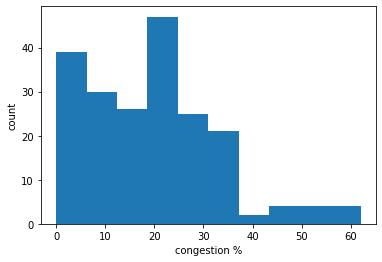

In [90]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df5["beij_cong_2020"])

# congestion histogram
# set x/y labels and plot title
plt.pyplot.xlabel("congestion %")
plt.pyplot.ylabel("count")

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [91]:
bins = np.linspace(0, 75, 4)
bins

array([ 0., 25., 50., 75.])

 We set group  names:

In [92]:
group_names = ['good', 'moderate', 'high']

In [93]:
df5['binned'] = pd.cut(df5['beij_cong_2020'], bins, labels=group_names, include_lowest=True )
df5[['beij_cong_2020','binned']]
# df5
# def print_full(x):  
#     pd.set_option('display.max_rows', len(x))
#     pd.set_option('display.max_columns', None)
#     pd.set_option('display.width', 2000)
#     pd.set_option('display.float_format', '{:20,.2f}'.format)
#     pd.set_option('display.max_colwidth', None)
#     print(x)
#     pd.reset_option('display.max_rows')
#     pd.reset_option('display.max_columns')
#     pd.reset_option('display.width')
#     pd.reset_option('display.float_format')
#     pd.reset_option('display.max_colwidth')
# print_full(df['horsepower'])   prints full columns

,beij_cong_2020,binned
2,23.000000,good
3,40.000000,moderate
4,48.000000,moderate
5,33.000000,moderate
6,28.000000,moderate
...,...,...
200,10.000000,good
201,25.000000,good
202,19.693122,good
203,19.693122,good


Lets see the congestion categories.

In [94]:
df5["binned"].value_counts()

good        146
moderate     48
high          8
Name: binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'congestion bins')

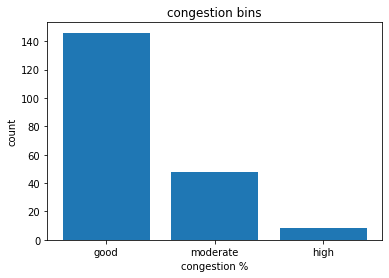

In [95]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df5["binned"].value_counts())

# # set x/y labels and plot title
plt.pyplot.xlabel("congestion %")
plt.pyplot.ylabel("count")
plt.pyplot.title("congestion bins")

In [96]:
df5

,date,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019,no2norm,pm25norm,binned
2,01-Jan-20,23.000000,-41.000000,28.0,116.0,16.0,25.0,13.570000,0.666667,1.000000,good
3,02-Jan-20,40.000000,0.000000,27.0,56.0,15.0,27.0,40.000000,0.642857,0.482759,moderate
4,03-Jan-20,48.000000,9.000000,31.0,45.0,16.0,14.0,52.320000,0.738095,0.387931,moderate
5,04-Jan-20,33.000000,-3.000000,28.0,46.0,11.0,22.0,32.010000,0.666667,0.396552,moderate
6,05-Jan-20,28.000000,-7.000000,9.0,36.0,9.0,27.0,26.040000,0.214286,0.310345,moderate
...,...,...,...,...,...,...,...,...,...,...,...
200,19-Jul-20,10.000000,-67.000000,15.0,35.0,13.0,29.0,3.300000,0.357143,0.301724,good
201,20-Jul-20,25.000000,-32.000000,19.0,43.0,14.0,30.0,17.000000,0.452381,0.370690,good
202,21-Jul-20,19.693122,-48.830688,22.0,46.0,19.0,41.0,10.076835,0.523810,0.396552,good
203,22-Jul-20,19.693122,-48.830688,26.0,50.0,19.0,39.0,10.076835,0.619048,0.431034,good


<h2> Analyzing Individual Feature Patterns using Visualization</h2>

<h3> Pearsons correlation co-efficient</h3>


In [97]:
df5.corr()

,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019,no2norm,pm25norm
beij_cong_2020,1.000000,0.987353,-0.115820,-0.103284,-0.069794,-0.025597,0.932005,-0.115820,-0.103284
beij_diff_2019,0.987353,1.000000,-0.128688,-0.129119,-0.085892,-0.026267,0.934331,-0.128688,-0.129119
no2,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000
pm10,-0.069794,-0.085892,0.237967,0.462807,1.000000,0.214213,-0.101258,0.237967,0.462807
o3,-0.025597,-0.026267,-0.101723,0.103611,0.214213,1.000000,-0.073378,-0.101723,0.103611
beij_cong_2019,0.932005,0.934331,-0.059065,-0.149558,-0.101258,-0.073378,1.000000,-0.059065,-0.149558
no2norm,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25norm,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000


In [98]:
corr = df5.corr()
corr.style.background_gradient(cmap='hot') #Greys, Reds, hot 

,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019,no2norm,pm25norm
beij_cong_2020,1.000000,0.987353,-0.115820,-0.103284,-0.069794,-0.025597,0.932005,-0.115820,-0.103284
beij_diff_2019,0.987353,1.000000,-0.128688,-0.129119,-0.085892,-0.026267,0.934331,-0.128688,-0.129119
no2,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000
pm10,-0.069794,-0.085892,0.237967,0.462807,1.000000,0.214213,-0.101258,0.237967,0.462807
o3,-0.025597,-0.026267,-0.101723,0.103611,0.214213,1.000000,-0.073378,-0.101723,0.103611
beij_cong_2019,0.932005,0.934331,-0.059065,-0.149558,-0.101258,-0.073378,1.000000,-0.059065,-0.149558
no2norm,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25norm,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000


In [99]:
corr = df5.corr()
corr.style.background_gradient(cmap='Greys') #Greys, Reds, hot 

,beij_cong_2020,beij_diff_2019,no2,pm25,pm10,o3,beij_cong_2019,no2norm,pm25norm
beij_cong_2020,1.000000,0.987353,-0.115820,-0.103284,-0.069794,-0.025597,0.932005,-0.115820,-0.103284
beij_diff_2019,0.987353,1.000000,-0.128688,-0.129119,-0.085892,-0.026267,0.934331,-0.128688,-0.129119
no2,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000
pm10,-0.069794,-0.085892,0.237967,0.462807,1.000000,0.214213,-0.101258,0.237967,0.462807
o3,-0.025597,-0.026267,-0.101723,0.103611,0.214213,1.000000,-0.073378,-0.101723,0.103611
beij_cong_2019,0.932005,0.934331,-0.059065,-0.149558,-0.101258,-0.073378,1.000000,-0.059065,-0.149558
no2norm,-0.115820,-0.128688,1.000000,0.068754,0.237967,-0.101723,-0.059065,1.000000,0.068754
pm25norm,-0.103284,-0.129119,0.068754,1.000000,0.462807,0.103611,-0.149558,0.068754,1.000000
